In [1]:
# !pip install tensorflow 
# !pip install prophet
# !pip install pandas
# !pip install matplotlib
# !pip install prophet
# !pip install sklearn
# !pip install statsmodel

In [2]:
# Link to dataset downloaded and refferenced in code:
# https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs?resource=download

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("archive/Stocks/aapl.us.txt")
df = df.iloc[:,:-1]

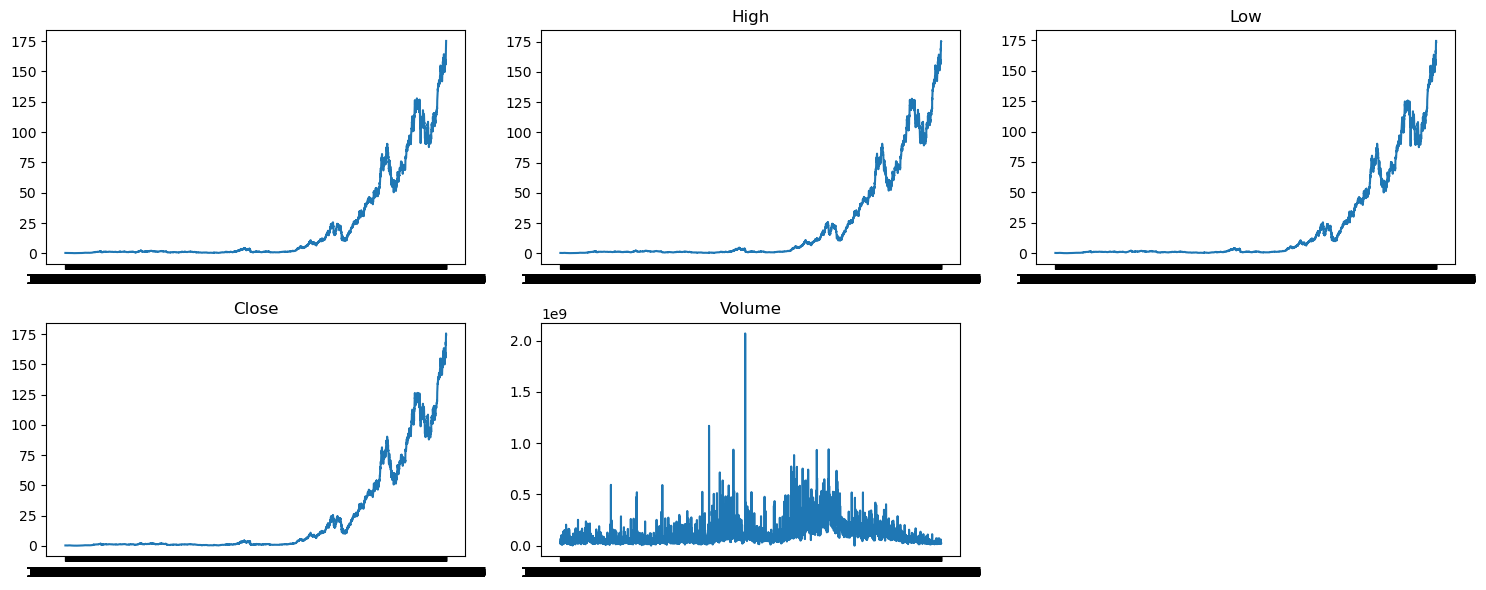

In [3]:
# # Simple Data Display:

# Set the figure size
plt.figure(figsize=(15, 6))

# Create a 2x3 grid of subplots
plt.subplot(2, 3, 1)
plt.plot(df['Date'], df['Open'])

plt.subplot(2, 3, 2)
plt.plot(df['Date'], df['High'])
plt.title('High')

plt.subplot(2, 3, 3)
plt.plot(df['Date'], df['Low'])
plt.title('Low')

plt.subplot(2, 3, 4)
plt.plot(df['Date'], df['Close'])
plt.title('Close')

plt.subplot(2, 3, 5)
plt.plot(df['Date'], df['Volume'])
plt.title('Volume')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [4]:
# Calculate the Moving Average for Open price over the last 5 days
df['MA_Open_5'] = df['Open'].rolling(5).mean()

# Calculate the Moving Average for Close price over the last 5 days
df['MA_Close_5'] = df['Close'].rolling(5).mean()

# Calculate the Moving Average for Volume over the last 5 days
df['MA_Volume_5'] = df['Volume'].rolling(5).mean()

# Calculate the Relative Strength Index over the last 14 days
delta = df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
rs = avg_gain / avg_loss
df['RSI_14'] = 100 - (100 / (1 + rs))

# Calculate the Commodity Channel Index over the last 20 days
tp = (df['High'] + df['Low'] + df['Close']) / 3
ma = tp.rolling(20).mean()
dev = (tp - ma).abs().rolling(20).mean()
cci = (tp - ma) / (0.015 * dev)
df['CCI_20'] = cci

# Calculate the Exponential Moving Average for Close price over the last 10 days
df['EMA_Close_10'] = df['Close'].ewm(span=10, adjust=False).mean()

# Calculate the Bollinger Bands over the last 20 days
sma = df['Close'].rolling(20).mean()
std = df['Close'].rolling(20).std()
df['BB_upper_20'] = sma + 2 * std
df['BB_lower_20'] = sma - 2 * std

# Fill null values with mean for all columns except 'Date', since nulls will happen for the first
# Few rows where rolling average cannot be computed
df[df.columns.difference(['Date'])] = df[df.columns.difference(['Date'])].apply(lambda x: x.fillna(x.mean()))

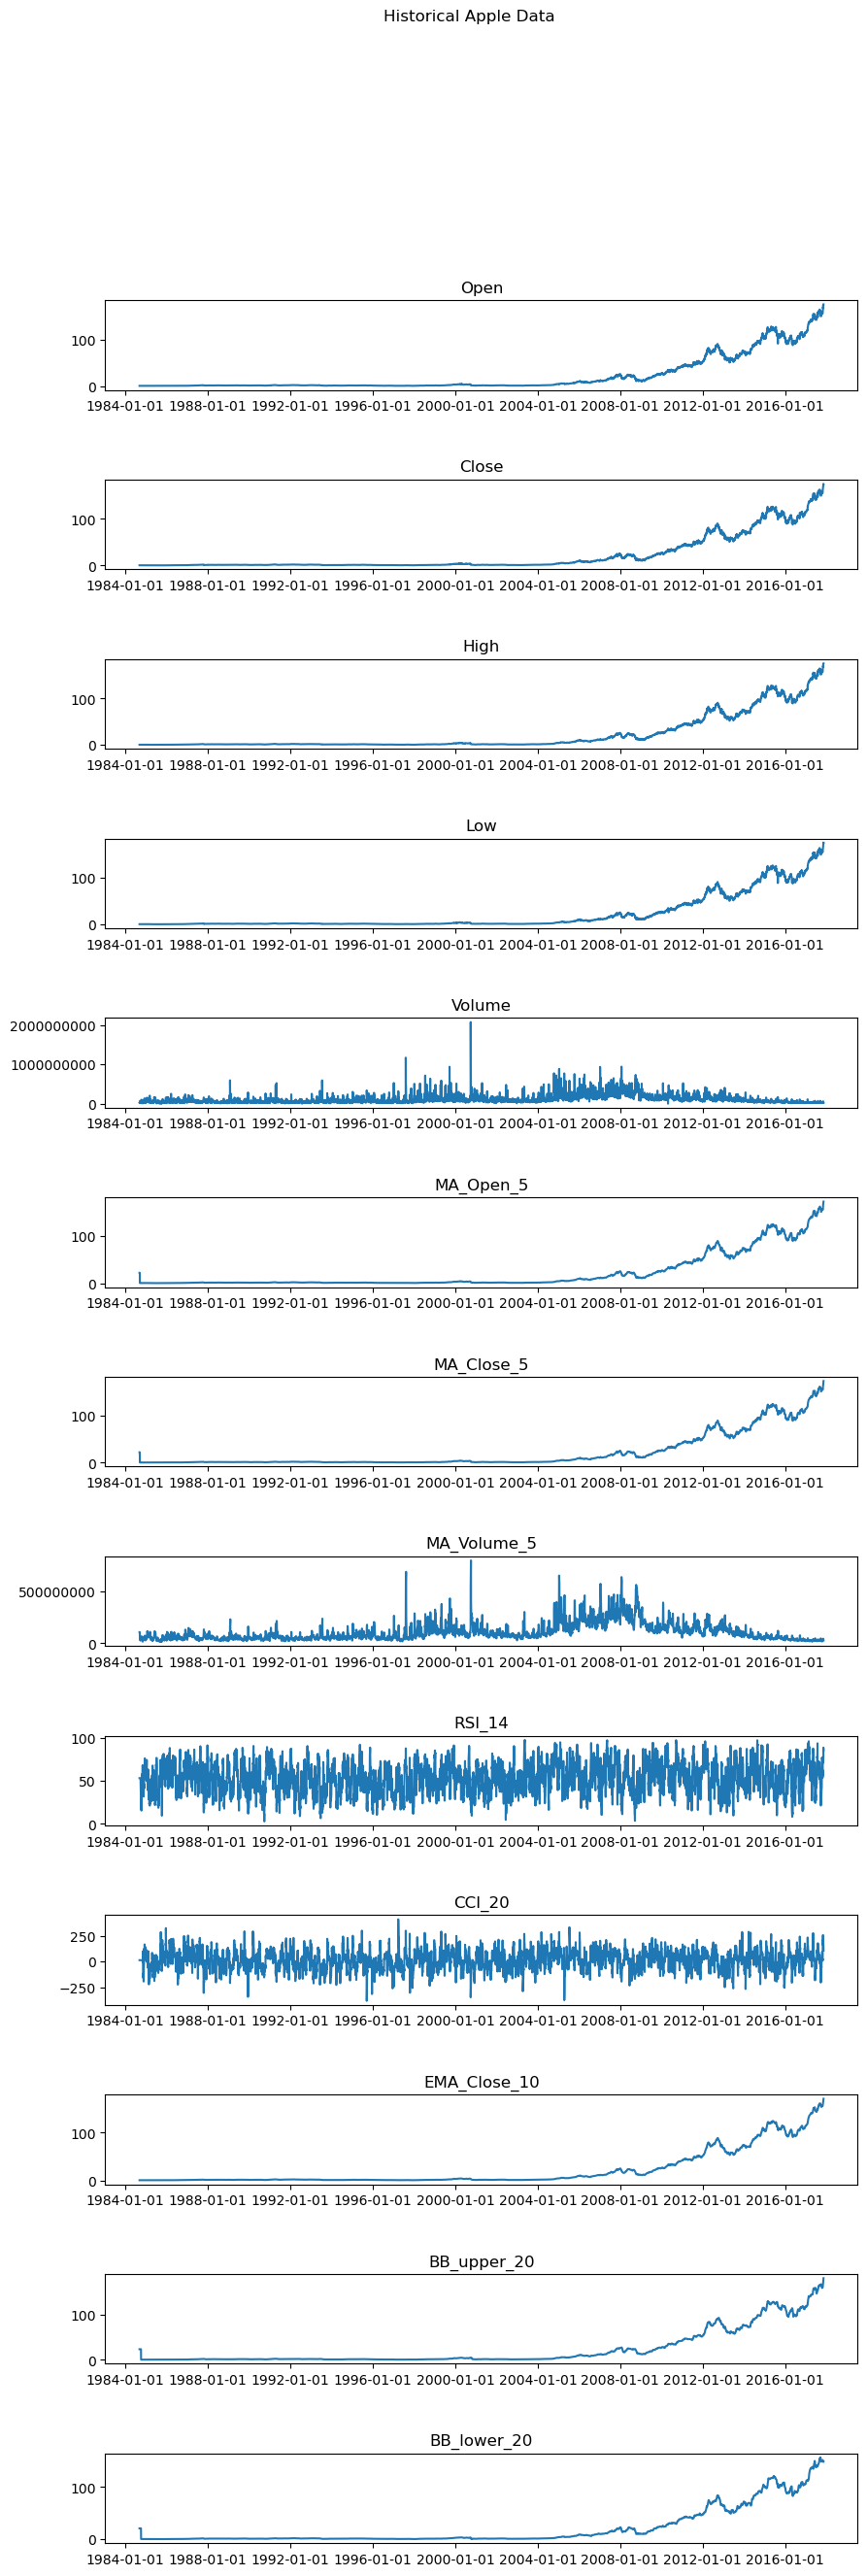

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'MA_Open_5',
       'MA_Close_5', 'MA_Volume_5', 'RSI_14', 'CCI_20', 'EMA_Close_10',
       'BB_upper_20', 'BB_lower_20', 'datetime'],
      dtype='object')


In [5]:
import matplotlib.dates as mdates

# convert date column to datetime format
df['datetime'] = pd.to_datetime(df['Date'])

# create subplots
fig, axes = plt.subplots(nrows=13, ncols=1, figsize=(10, 30))

fig.subplots_adjust(hspace=1,wspace=1)

# iterate over features and plot each one
for i, feature in enumerate(['Open', 'Close', 'High', 'Low', 'Volume', 
                             'MA_Open_5', 'MA_Close_5', 'MA_Volume_5', 'RSI_14', 'CCI_20',
                            'EMA_Close_10', 'BB_upper_20', 'BB_lower_20']):
    ax = axes[i]
    ax.plot(df['datetime'], df[feature])
    # ax.set_xlabel('Date')
    #ax.set_ylabel(feature)
    ax.ticklabel_format(style='plain', axis='y', scilimits=(0,0), useOffset=False)
    ax.set_title(feature)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# add title to the figure
fig.suptitle('Historical Apple Data')
plt.show()

print(df.columns)